Import Libraries

In [1]:
import pandas as pd  #for data analysis and manipulation->like loading datasets, handling dataframes, cleaning, and preprocessing.
import numpy as np  #for numerical operations, arrays, and mathematical functions.
import matplotlib.pyplot as plt  #for creating static, animated, and interactive visualizations->provides functions like plot(), show(), hist(), etc
import seaborn as sns  #A data visualization library built on top of matplotlib->It provides high-level functions to create attractive and informative statistical graphics (heatmaps, boxplots, etc.)
import warnings # helps manage warning messages-> Useful to suppress unnecessary warnings during data analysis
warnings.filterwarnings('ignore')

# Step 1:EDA/Visualizations

1: Load Dataset

In [2]:
# To Load the CSV files
df = pd.read_csv('telecommunications_churn.csv')

In [3]:
print("Shape (rows, columns):", df.shape)

Shape (rows, columns): (3333, 19)


2: Basic Info about Data

In [4]:
print("\nColumns in dataset:\n", df.columns.tolist())
print("\nData Types:\n")
print(df.dtypes)
print("\n Missing Values:\n")
print(df.isnull().sum())


Columns in dataset:
 ['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins', 'evening_mins', 'night_mins', 'international_mins', 'customer_service_calls', 'international_plan', 'day_calls', 'day_charge', 'evening_calls', 'evening_charge', 'night_calls', 'night_charge', 'international_calls', 'international_charge', 'total_charge', 'churn']

Data Types:

account_length              int64
voice_mail_plan             int64
voice_mail_messages         int64
day_mins                  float64
evening_mins              float64
night_mins                float64
international_mins        float64
customer_service_calls      int64
international_plan          int64
day_calls                   int64
day_charge                float64
evening_calls               int64
evening_charge            float64
night_calls                 int64
night_charge              float64
international_calls         int64
international_charge      float64
total_charge              float64
churn         

In [5]:
df.isna().sum() #Checking any NAN or NA value is there or not

,0
account_length,0
voice_mail_plan,0
voice_mail_messages,0
day_mins,0
evening_mins,0
night_mins,0
international_mins,0
customer_service_calls,0
international_plan,0
day_calls,0


In [6]:
# Show first 5 rows
print("\nFirst 5 rows of dataset:\n")
display(df.head())


First 5 rows of dataset:



,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0


In [7]:
# Check duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


3: Separate columns

In [8]:
# Binary categorical columns
binary_cat_cols = ['voice_mail_plan', 'international_plan', 'churn']
print(" Binary categorical columns:", binary_cat_cols)

 Binary categorical columns: ['voice_mail_plan', 'international_plan', 'churn']


In [9]:
# discrete numerical variable (but often treated as categorical in EDA).
# Tree-based models (Random Forest, XGBoost, LightGBM) → keep it as numerical.They’ll automatically learn rules like “if customer_service_calls ≥ 4 → churn probability increases”.
# Linear models (Logistic Regression, SVM, etc.) → better to one-hot encode it (treat as categorical). This avoids forcing a straight-line relationship between calls and churn.
discrete_cat_cols = ['customer_service_calls']
print("Discrete categorical columns:", discrete_cat_cols)

Discrete categorical columns: ['customer_service_calls']


In [10]:
# Continuous numerical columns
num_cols = [col for col in df.columns if col not in binary_cat_cols + discrete_cat_cols]
print("Continuous numerical columns:", num_cols)

Continuous numerical columns: ['account_length', 'voice_mail_messages', 'day_mins', 'evening_mins', 'night_mins', 'international_mins', 'day_calls', 'day_charge', 'evening_calls', 'evening_charge', 'night_calls', 'night_charge', 'international_calls', 'international_charge', 'total_charge']


4. Summary statistics

In [11]:
print("\n Summary Statistics for Continuous Numerical Features:\n")
display(df[num_cols].describe().T)


 Summary Statistics for Continuous Numerical Features:



,count,mean,std,min,25%,50%,75%,max
account_length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
voice_mail_messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
day_mins,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
evening_mins,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
night_mins,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00
international_mins,3333.0,10.237294,2.791840,0.00,8.50,10.30,12.10,20.00
day_calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
day_charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
evening_calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
evening_charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91


In [12]:
print("\nFrequency Counts for Binary Categorical Features:\n")
for col in binary_cat_cols:
    counts = df[col].value_counts().to_dict()
    print(f"{col}: {counts}")


Frequency Counts for Binary Categorical Features:

voice_mail_plan: {0: 2411, 1: 922}
international_plan: {0: 3010, 1: 323}
churn: {0: 2850, 1: 483}


In [13]:
print("\nFrequency Counts for Discrete Categorical Features:\n")
for col in discrete_cat_cols:
    counts = df[col].value_counts().sort_index().to_dict()  # sort_index for ascending order
    print(f"{col}: {counts}\n")


Frequency Counts for Discrete Categorical Features:

customer_service_calls: {0: 697, 1: 1181, 2: 759, 3: 429, 4: 166, 5: 66, 6: 22, 7: 9, 8: 2, 9: 2}



5.Visualization

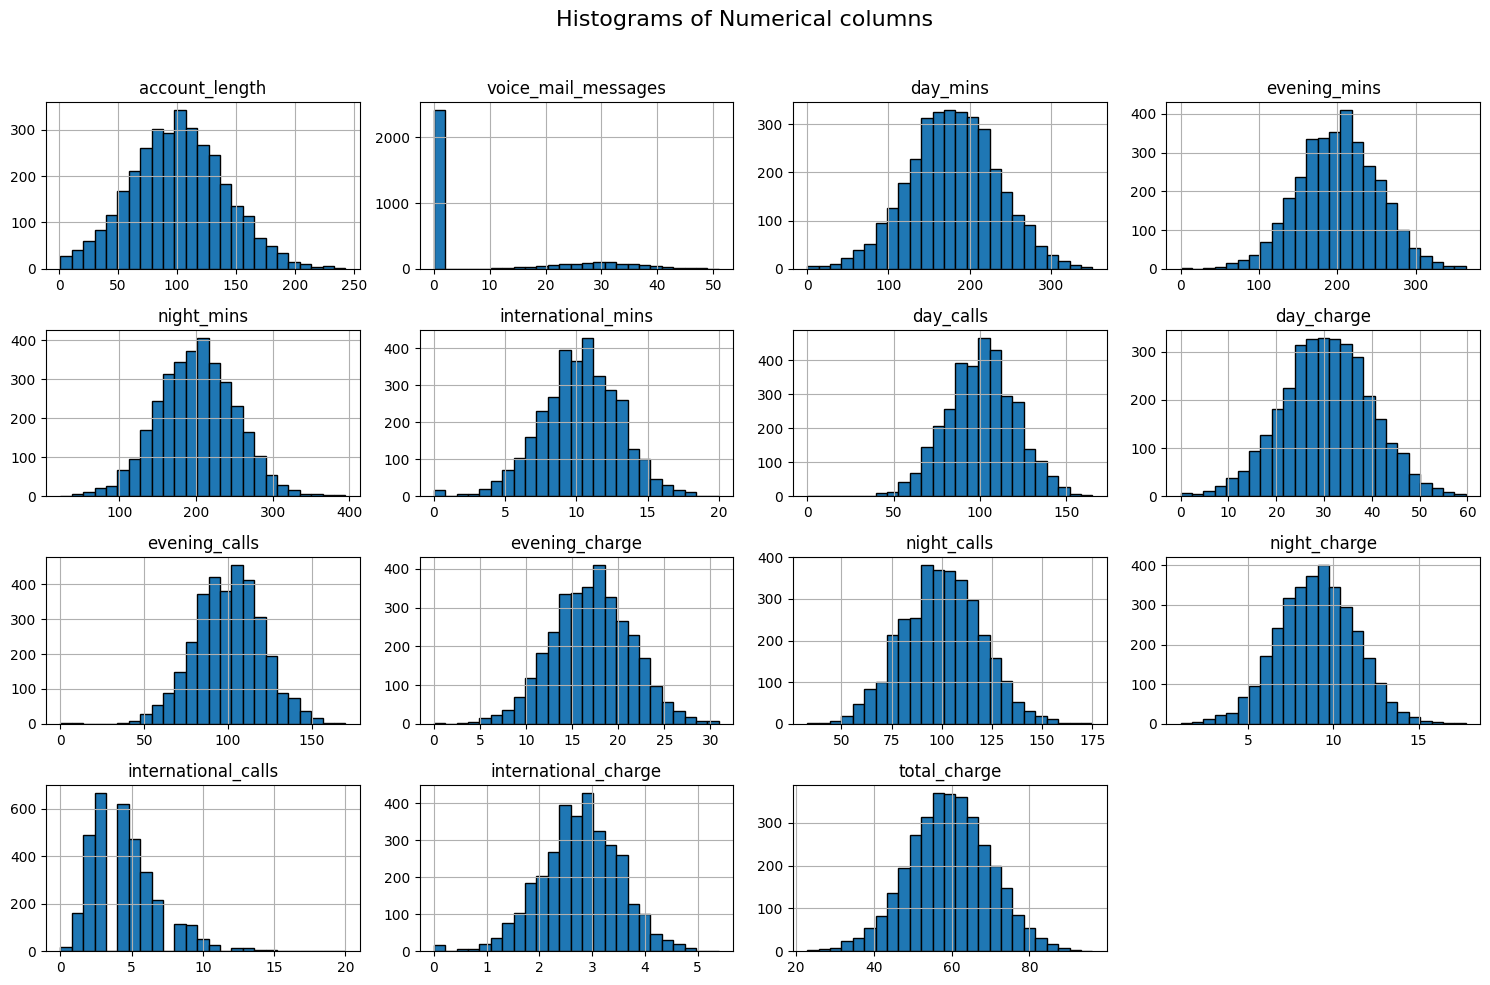

In [14]:
# Continuous numerical columns
df[num_cols].hist(figsize=(15, 10), bins=25, edgecolor='black')
plt.suptitle("Histograms of Numerical columns", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for suptitle
plt.show()

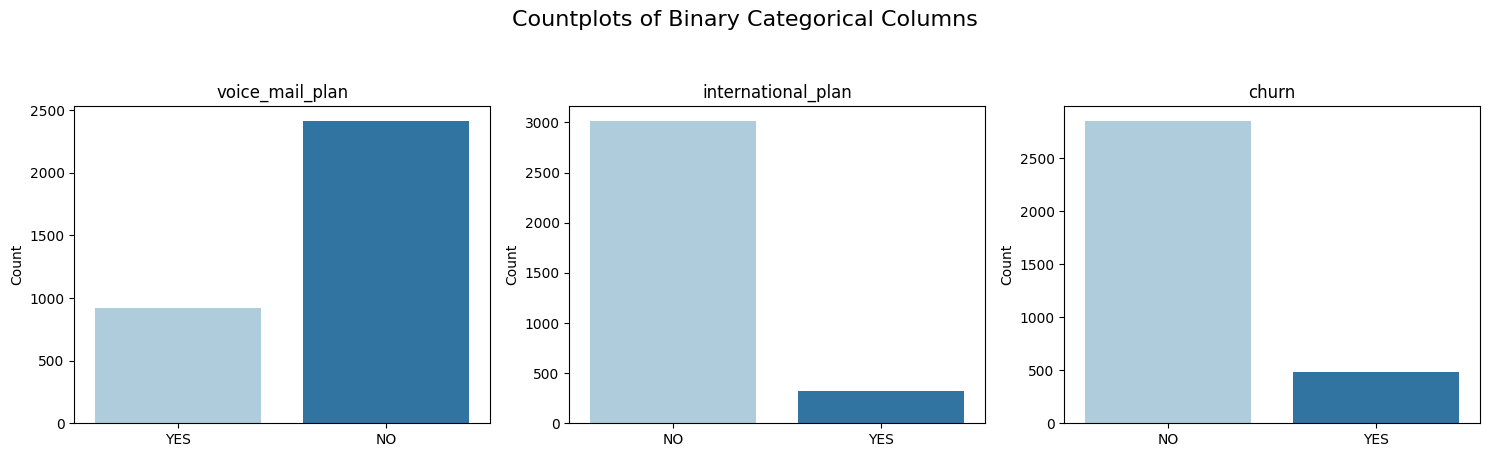

In [15]:
#Countplot (Bar plot) for binary categorical columns [0-->NO, 1-->YEs]
plt.figure(figsize=(15, 8))

for i, col in enumerate(binary_cat_cols, 1):
    plt.subplot(len(binary_cat_cols)//3 + 1, 3, i)  # arrange in grid (3 per row)

    # Map 0 and 1 to 'NO' and 'YES' for the plot
    mapped_values = df[col].map({0: 'NO', 1: 'YES'})

    sns.countplot(x=mapped_values, palette="Paired")
    plt.title(f"{col}")
    plt.xlabel("")   # remove x-label (optional)
    plt.ylabel("Count")

plt.suptitle("Countplots of Binary Categorical Columns", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # adjust layout for suptitle
plt.show()

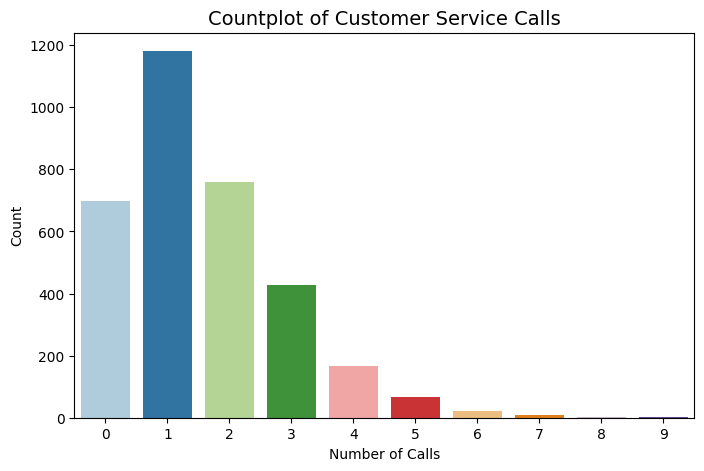

In [16]:
#Countplot (Bar plot) for discrete numerical variable
#Values range from 0 → 9 (integers).
#These are counts of calls (a small finite set of discrete numbers).
plt.figure(figsize=(8,5))
sns.countplot(x=df["customer_service_calls"], palette="Paired")
plt.title("Countplot of Customer Service Calls", fontsize=14)
plt.xlabel("Number of Calls")
plt.ylabel("Count")
plt.show()

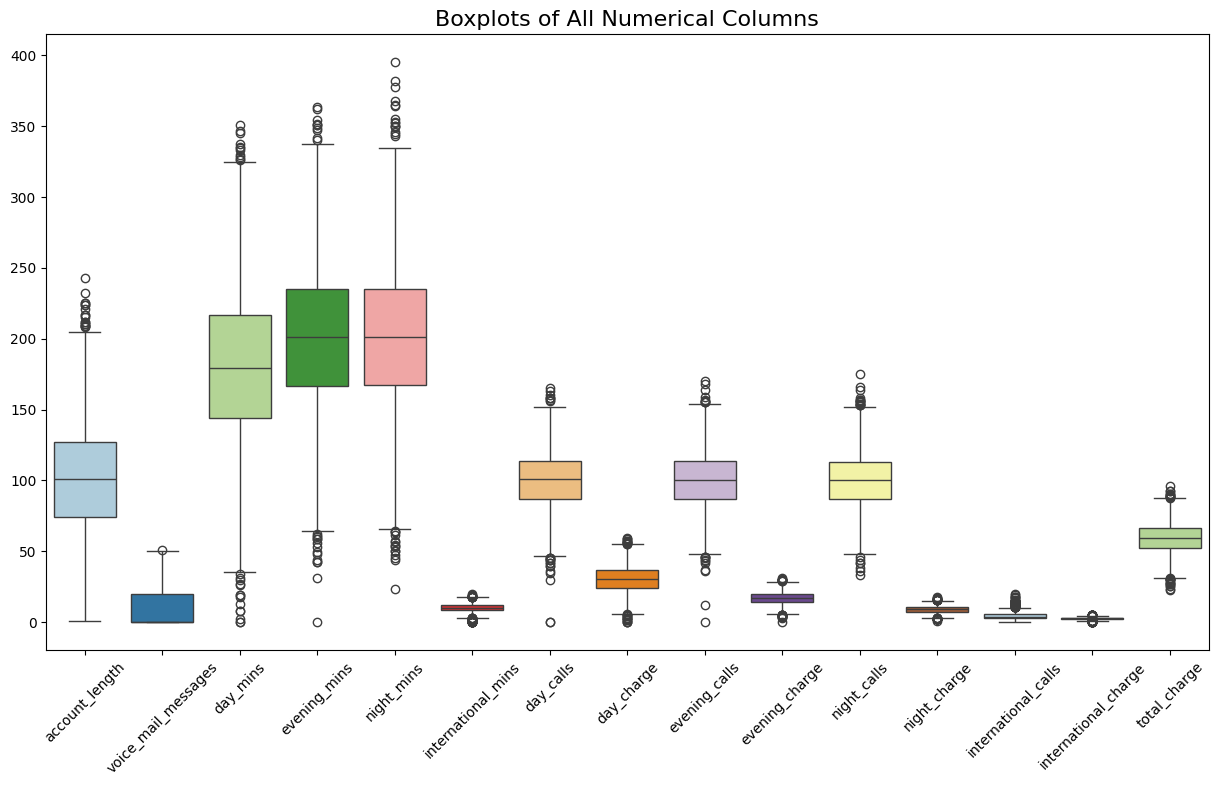

In [17]:
# Boxplots for numerical features (detect outliers)
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[num_cols], palette="Paired")
plt.title("Boxplots of All Numerical Columns", fontsize=16)
plt.xticks(rotation=45)
plt.show()

#Bivariate Analysis

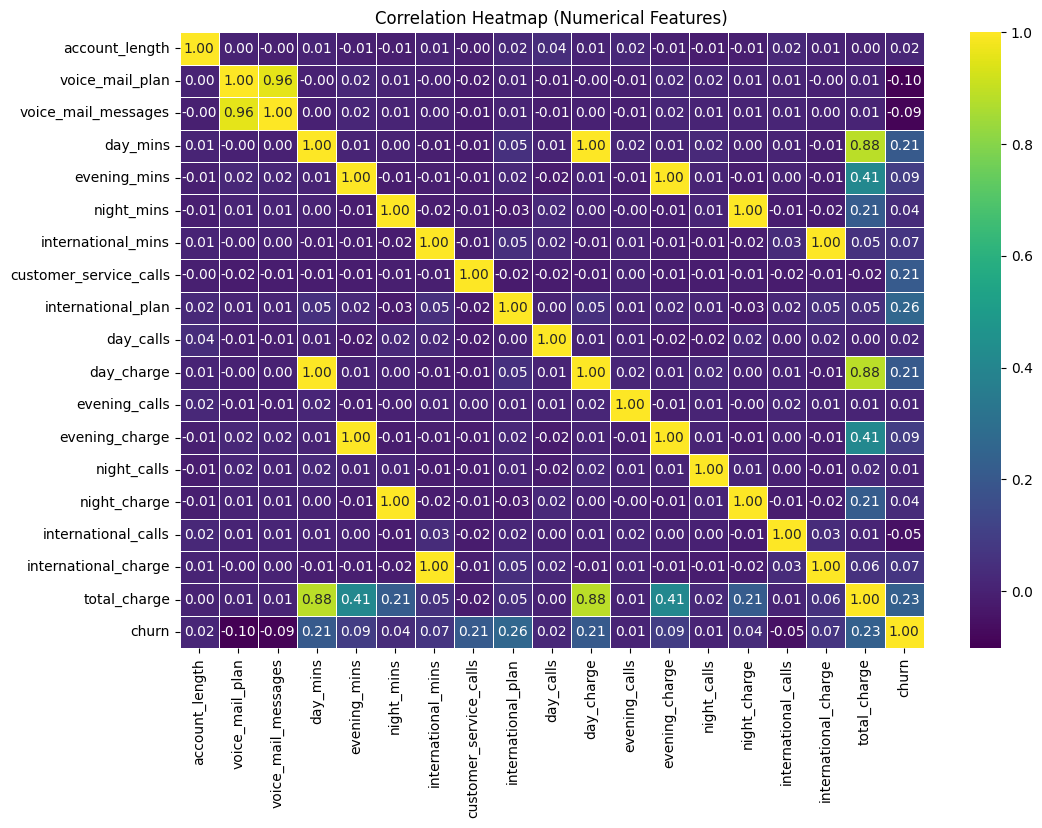

In [18]:
# Step : Correlation heatmap (only numerical columns)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="viridis", linewidths=0.5 , fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

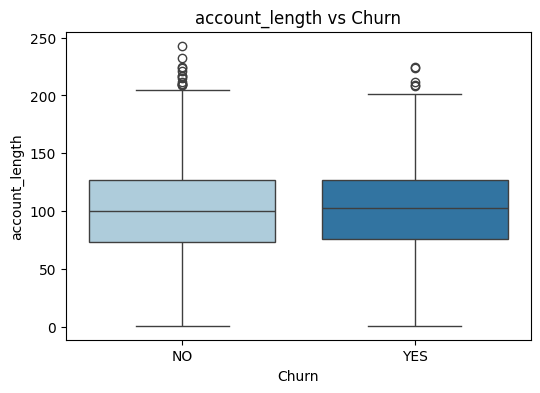

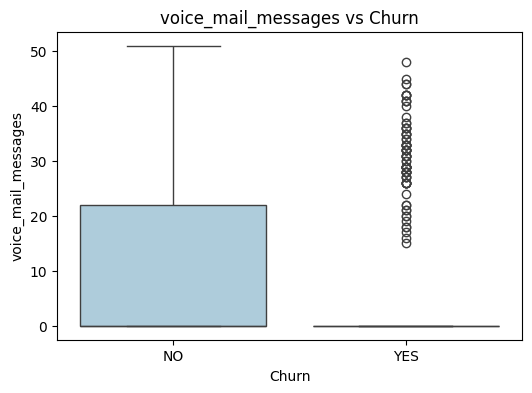

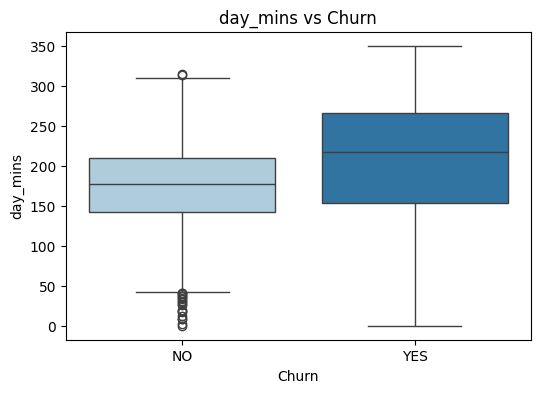

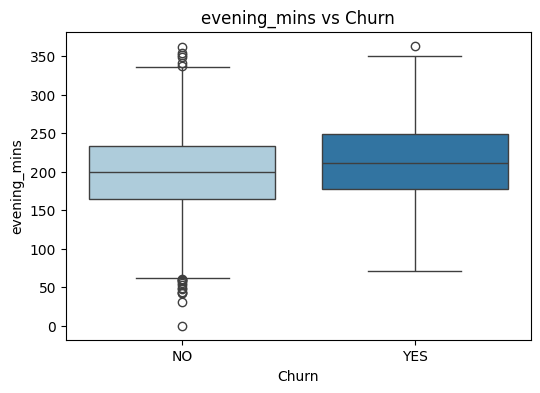

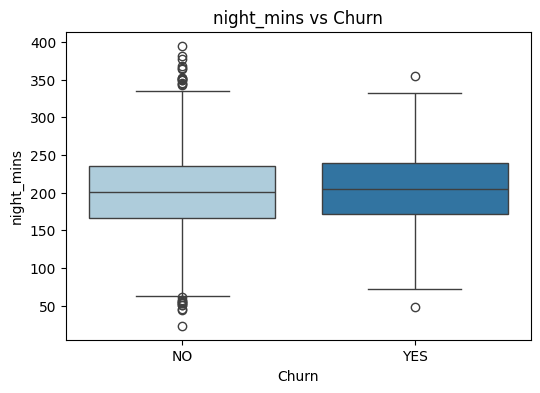

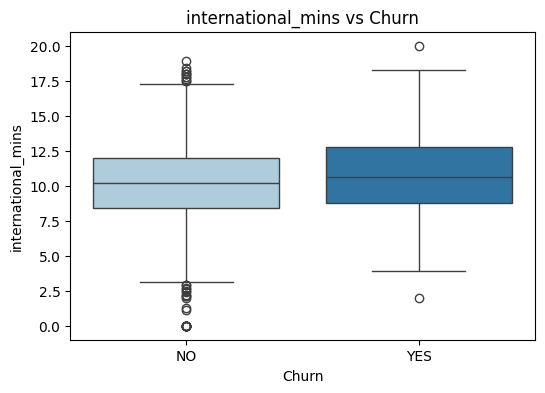

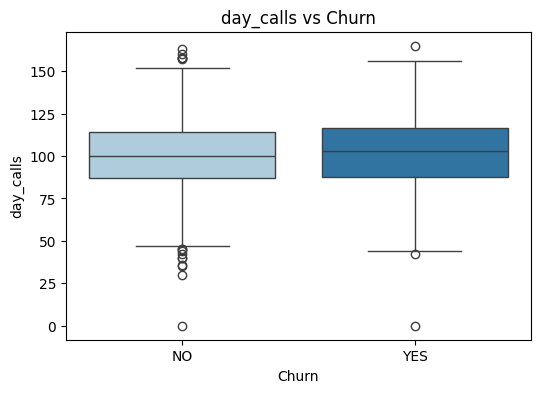

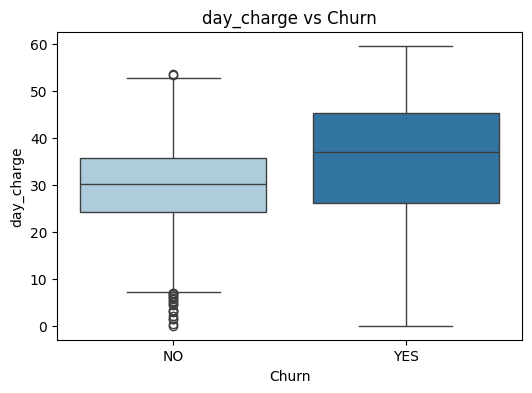

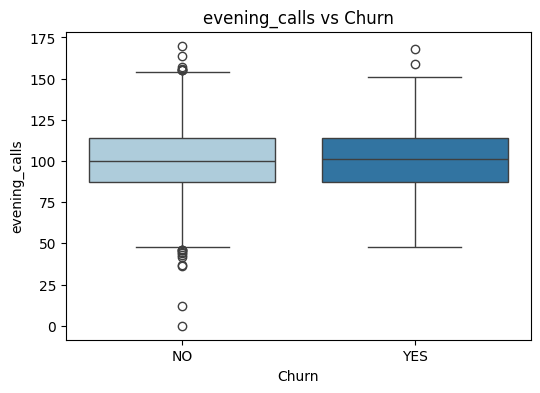

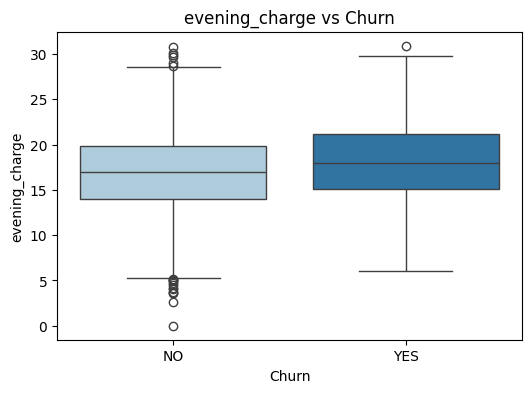

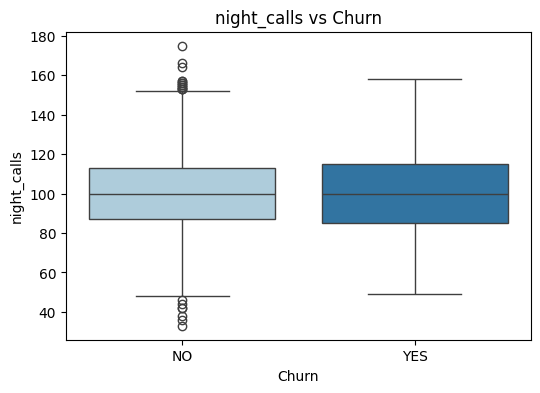

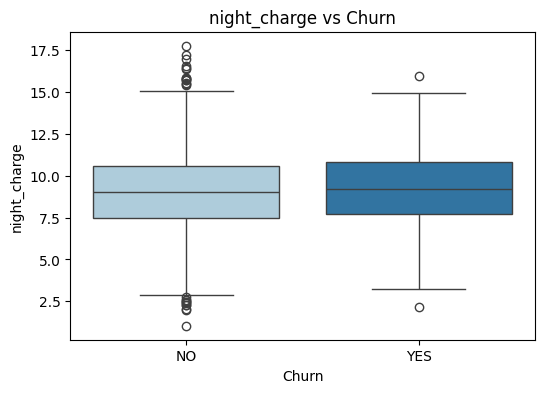

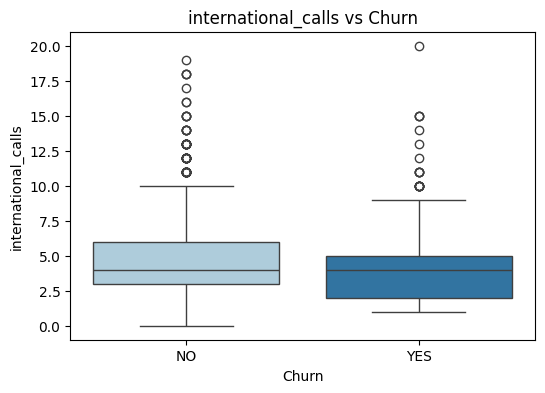

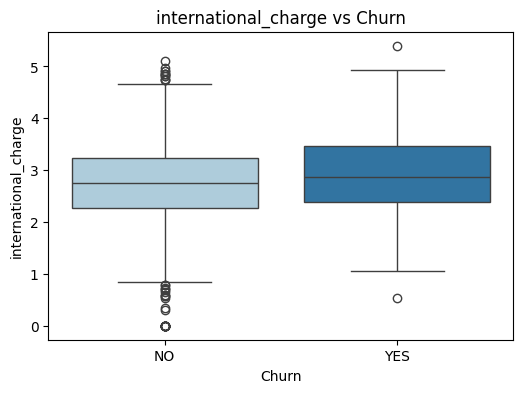

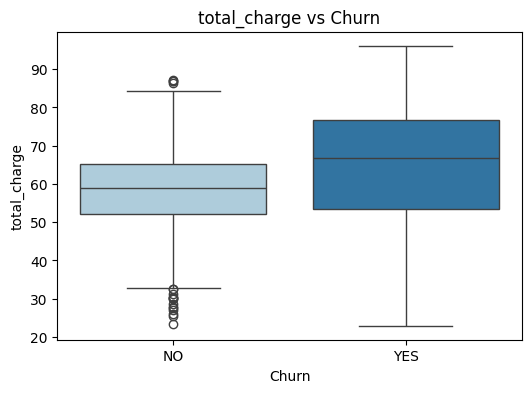

In [19]:
# Numerical vs Churn (boxplots) with labels 0->NO, 1->YES #box represents the distribution of Numerical columns for that churn category.
churn_mapping = {0: 'NO', 1: 'YES'}
target_col = "churn" #Churn is our target column
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[target_col].map(churn_mapping), y=df[col], palette="Paired")
    plt.title(f"{col} vs Churn")
    plt.xlabel("Churn")
    plt.show()

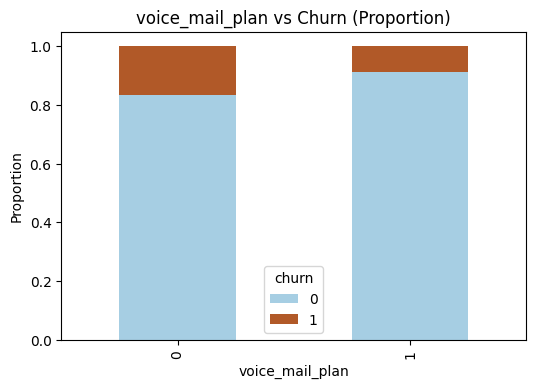

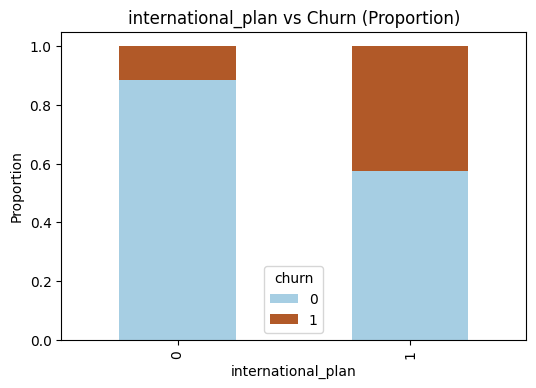

In [20]:
# Categorical vs Churn (stacked bar plots)
for col in binary_cat_cols:
    if col != target_col:
        ct = pd.crosstab(df[col], df[target_col], normalize="index")
        ct.plot(kind="bar", stacked=True, figsize=(6,4), colormap="Paired")
        plt.title(f"{col} vs Churn (Proportion)")
        plt.ylabel("Proportion")
        plt.show()

##Handling Outliers using IQR Method

In [21]:
# Function to cap outliers in a column using the IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap values below or above the thresholds
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

In [22]:
# List of columns to cap
features_to_cap = [
    'customer_service_calls', 'international_calls', 'international_charge', 'international_mins',
    'night_mins', 'night_charge', 'total_charge', 'day_mins', 'day_charge',
    'evening_charge', 'evening_mins', 'day_calls', 'night_calls', 'evening_calls',
    'account_length'
]

In [80]:
# Apply capping to all selected columns
# Create a copy of the original DataFrame to apply outlier capping without affecting the original data
df_capped = df.copy()

# Loop through each column in 'features_to_cap' (the list of columns where outliers need to be capped)
for col in features_to_cap:
    # Apply the outlier capping function 'cap_outliers' to each column in the copied DataFrame
    # This modifies 'df_capped' by limiting extreme values in the specified column
    cap_outliers(df_capped, col)


print("Outlier handling completed.")

Outlier handling completed.


Boxplots (Before vs After)

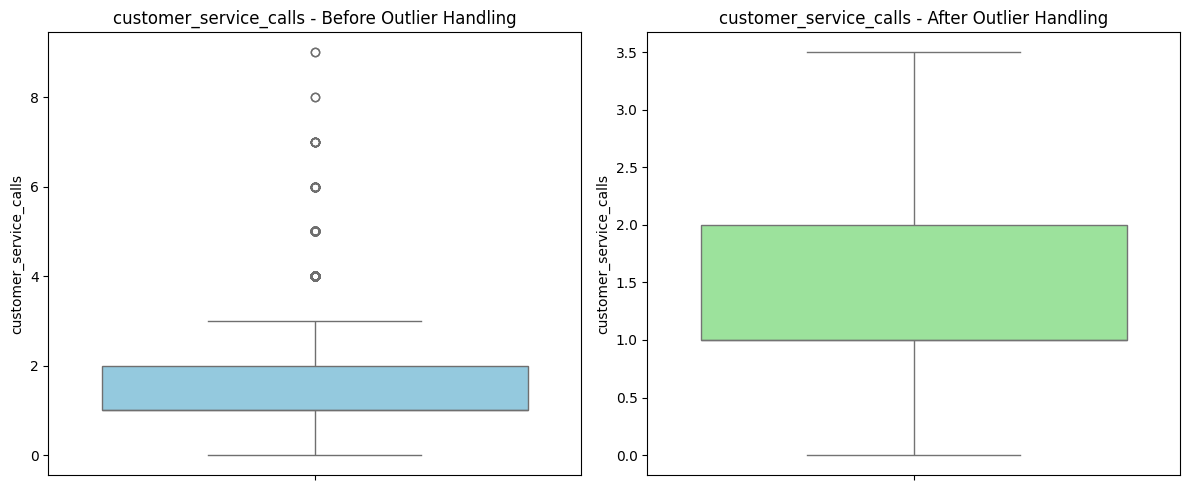

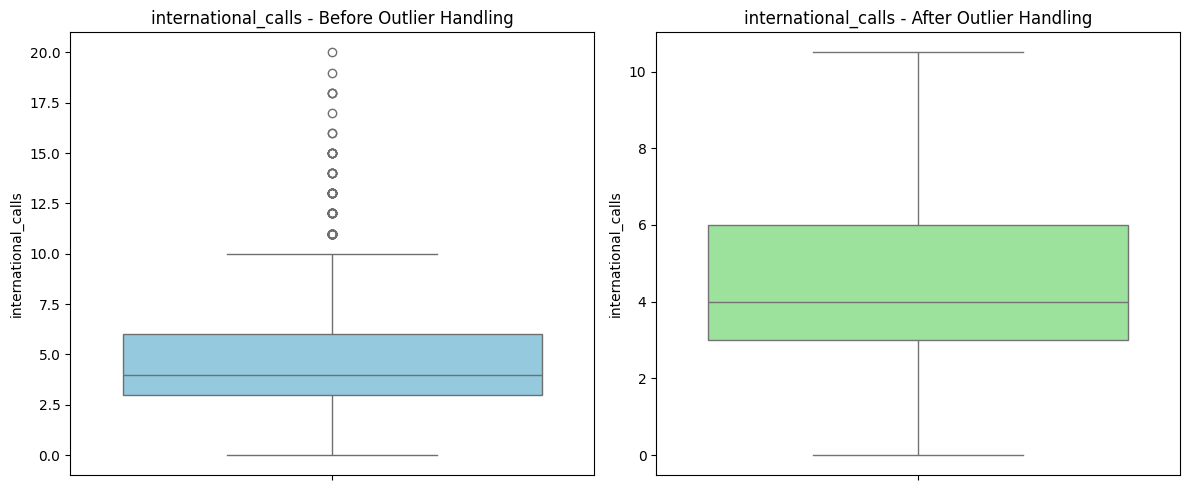

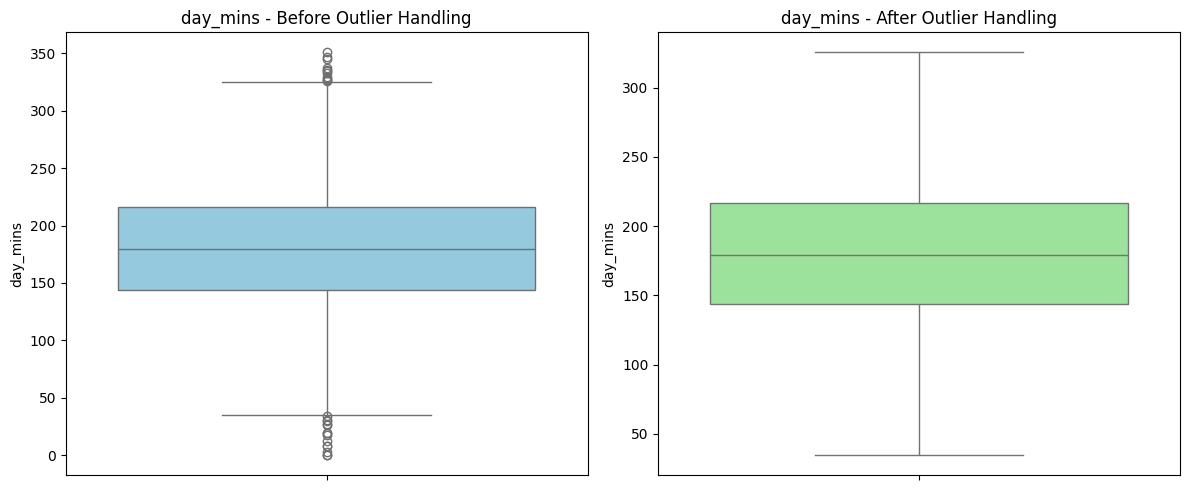

In [24]:
features = ['customer_service_calls', 'international_calls', 'day_mins']

for col in features:
    plt.figure(figsize=(12, 5))

    # Before capping
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'{col} - Before Outlier Handling')

    # After capping
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_capped[col], color='lightgreen')
    plt.title(f'{col} - After Outlier Handling')

    plt.tight_layout()
    plt.show()

Histograms (Distribution Before vs After)
-> Histograms show how the data distribution has changed after handling outliers.

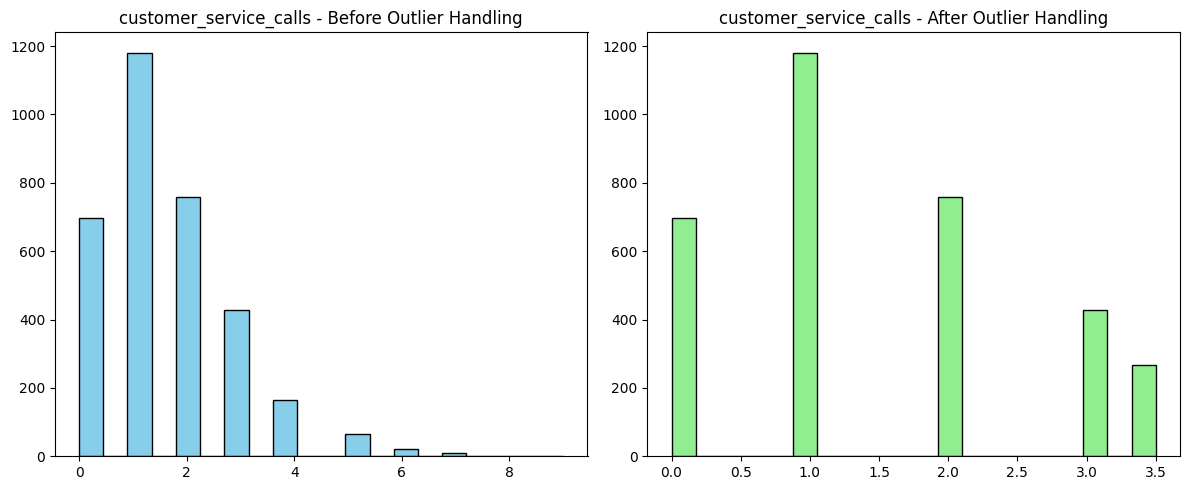

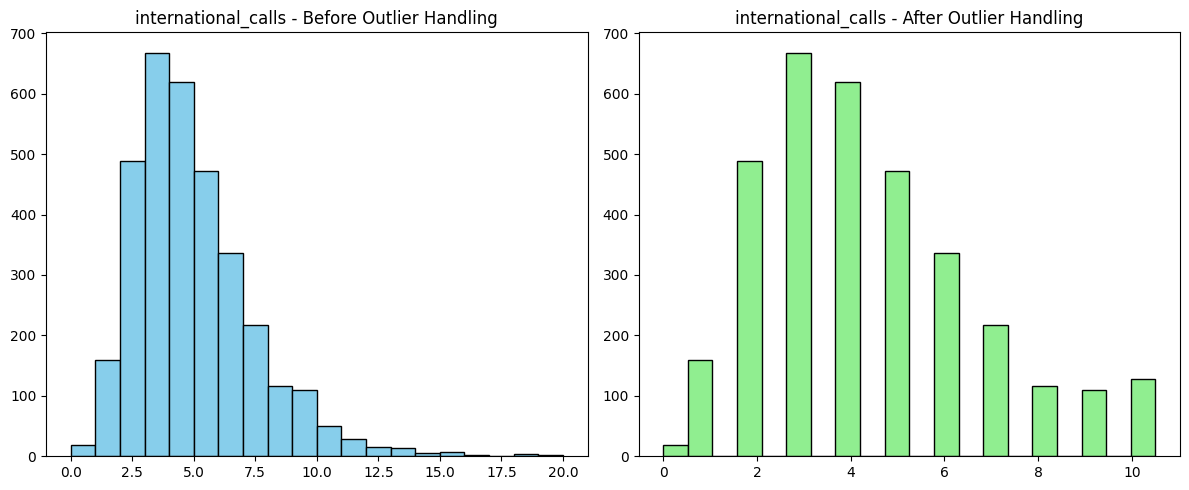

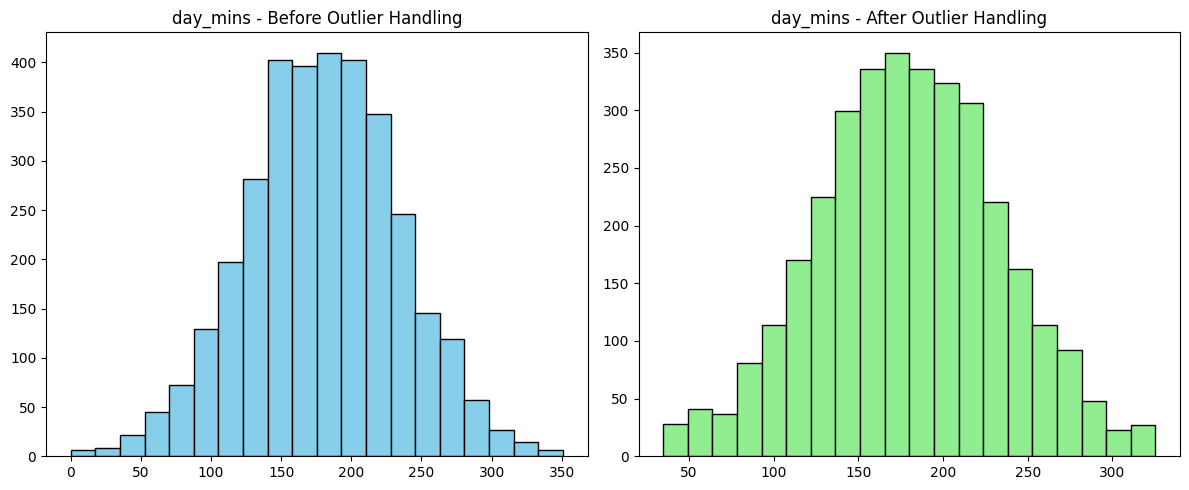

In [25]:
for col in features:
    plt.figure(figsize=(12, 5))

    # Before capping
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'{col} - Before Outlier Handling')

    # After capping
    plt.subplot(1, 2, 2)
    plt.hist(df_capped[col], bins=20, color='lightgreen', edgecolor='black')
    plt.title(f'{col} - After Outlier Handling')

    plt.tight_layout()
    plt.show()

## Feature Engineering

In [26]:
# Step 1: Copy the dataset after outlier handling
df_features = df_capped.copy()

In [68]:
# Step 2: Create new features that give more insights about user behavior

# 2.1 Average duration of calls during different times of the day
# Calculate the average duration of calls during the day
# We divide total minutes spent on day calls by the number of day calls
# A very small number (1e-5) is added to the denominator to prevent division by zero errors
df_features['avg_day_call_duration'] = df_features['day_mins'] / (df_features['day_calls'] + 1e-5)

# Calculate the average duration of calls during the evening
# We divide total minutes spent on evening calls by the number of evening calls
# Adding 1e-5 ensures that we don't get an error if evening_calls is zero
df_features['avg_evening_call_duration'] = df_features['evening_mins'] / (df_features['evening_calls'] + 1e-5)

# Calculate the average duration of calls during the night
# We divide total minutes spent on night calls by the number of night calls
# A small value is added to avoid division by zero when night_calls is zero
df_features['avg_night_call_duration'] = df_features['night_mins'] / (df_features['night_calls'] + 1e-5)

# Calculate the average duration of international calls
# We divide total minutes spent on international calls by the number of international calls
# Again, adding 1e-5 prevents division by zero if international_calls is zero
df_features['avg_international_call_duration'] = df_features['international_mins'] / (df_features['international_calls'] + 1e-5)

In [69]:
# 2.2 Create total calls and total minutes columns to capture overall usage
# Sum the calls from different times of the day: day, evening, night, and international
df_features['total_calls'] = (
    df_features['day_calls'] +            # Add day calls
    df_features['evening_calls'] +        # Add evening calls
    df_features['night_calls'] +          # Add night calls
    df_features['international_calls']   # Add international calls
)

# Create a new column 'total_mins' to represent the total duration of all calls
# Sum the minutes from different times of the day: day, evening, night, and international
df_features['total_mins'] = (
    df_features['day_mins'] +            # Add minutes of day calls
    df_features['evening_mins'] +        # Add minutes of evening calls
    df_features['night_mins'] +          # Add minutes of night calls
    df_features['international_mins']   # Add minutes of international calls
)

In [70]:
# 2.3 Flag users who make unusually high customer service calls
# We calculate the threshold using IQR (Interquartile Range) method
Q1 = df_features['customer_service_calls'].quantile(0.25)
Q3 = df_features['customer_service_calls'].quantile(0.75)
IQR = Q3 - Q1
upper_bound_calls = Q3 + 1.5 * IQR

# If customer_service_calls is greater than this threshold, mark as 1 (high), else 0 (normal)
df_features['high_customer_service_calls'] = (df_features['customer_service_calls'] > upper_bound_calls).astype(int)

In [30]:
# 2.4 Combine two plan-related columns into one to capture joint effects
df_features['plan_combination'] = df_features['international_plan'].astype(str) + "_" + df_features['voice_mail_plan'].astype(str)

In [31]:
# Step 3: Show the first few rows to confirm the new features are added
from IPython.display import display

# Show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)  # you can set it to None to show all rows if it's small

# Print message and display the dataset as a table
print("Feature engineering completed. Here’s the dataset:")
display(df_features)

Feature engineering completed. Here’s the dataset:


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,avg_day_call_duration,avg_evening_call_duration,avg_night_call_duration,avg_international_call_duration,total_calls,total_mins,high_customer_service_calls,plan_combination
0,128.0,1,25,265.1,197.40,244.7,10.0,1.0,0,110.0,45.07,99.0,16.78,91.0,11.01,3.0,2.70,75.56,0,2.410000,1.993939,2.689011,3.333322,303.0,717.20,0,0_1
1,107.0,1,26,161.6,195.50,254.4,13.7,1.0,0,123.0,27.47,103.0,16.62,103.0,11.45,3.0,3.70,59.24,0,1.313821,1.898058,2.469903,4.566651,332.0,625.20,0,0_1
2,137.0,0,0,243.4,121.20,162.6,12.2,0.0,0,114.0,41.38,110.0,10.30,104.0,7.32,5.0,3.29,62.29,0,2.135088,1.101818,1.563461,2.439995,333.0,539.40,0,0_0
3,84.0,0,0,299.4,63.55,196.9,6.6,2.0,1,71.0,50.90,88.0,5.40,89.0,8.86,7.0,1.78,66.80,0,4.216901,0.722159,2.212359,0.942856,255.0,566.45,0,1_0
4,75.0,0,0,166.7,148.30,186.9,10.1,3.0,1,113.0,28.34,122.0,12.61,121.0,8.41,3.0,2.73,52.09,0,1.475221,1.215574,1.544628,3.366655,359.0,512.00,0,1_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192.0,1,36,156.2,215.50,279.1,9.9,2.0,0,77.0,26.55,126.0,18.32,83.0,12.56,6.0,2.67,60.10,0,2.028571,1.710317,3.362650,1.649997,292.0,660.70,0,0_1
3329,68.0,0,0,231.1,153.40,191.3,9.6,3.0,0,57.0,39.29,55.0,13.04,123.0,8.61,4.0,2.59,63.53,0,4.054385,2.789090,1.555284,2.399994,239.0,585.40,0,0_0
3330,28.0,0,0,180.8,288.80,191.9,14.1,2.0,0,109.0,30.74,58.0,24.55,91.0,8.64,6.0,3.81,67.74,0,1.658715,4.979309,2.108791,2.349996,264.0,675.60,0,0_0
3331,184.0,0,0,213.8,159.60,139.2,5.0,2.0,1,105.0,36.35,84.0,13.57,137.0,6.26,10.0,1.35,57.53,0,2.036190,1.900000,1.016058,0.500000,336.0,517.60,0,1_0


## Model Building (Random Forest)

In [71]:
# Import libraries for modeling
# Import function to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Import the Random Forest classifier, an ensemble learning method for classification tasks
from sklearn.ensemble import RandomForestClassifier

# Import metrics to evaluate the model's performance
# accuracy_score: measures how often the classifier is correct
# confusion_matrix: shows the true vs predicted classifications in matrix form
# classification_report: gives detailed metrics like precision, recall, and f1-score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import tools for data preprocessing
# StandardScaler: standardizes features by removing the mean and scaling to unit variance
# LabelEncoder: encodes categorical labels with values between 0 and n_classes-1
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [33]:
# 1. Data Preparation

In [34]:
# Select features and target
# We exclude 'plan_combination' here for simplicity, or we can encode it later if needed
features = df_features.drop(['churn', 'plan_combination'], axis=1)
target = df_features['churn']

In [35]:
# Encode categorical columns if necessary
# In this dataset, 'international_plan' and 'voice_mail_plan' are already numerical (0 or 1)
# 'plan_combination' is excluded here but can be encoded if required

In [36]:
# Scale numerical features for better performance (optional for tree-based models but useful for others)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [72]:
# 2. Split the dataset into training and testing sets
# 'features_scaled' contains the input features that have been standardized
# 'target' contains the output labels we want to predict
# test_size=0.2 means 20% of the data will be used for testing, and 80% for training
# random_state=42 ensures the split is reproducible; using the same seed will give the same split every time
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [38]:
# 3. Train the Random Forest Classifier
# We're using RandomForestClassifier with 100 trees.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
# 4. Make Predictions

y_pred = rf_model.predict(X_test)

In [40]:
# 5. Evaluate the Model

In [41]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9805


Accuracy: 98.05% → The model is highly accurate in predicting churn vs non-churn cases.

In [42]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[566   0]
 [ 13  88]]


Confusion Matrix:

566 true negatives → Customers correctly predicted as not churning.

88 true positives → Customers correctly predicted as churning.

13 false negatives → Customers who churned but were missed by the model.

0 false positives → Customers predicted as churned but didn’t churn.

In [43]:
# Classification report (precision, recall, f1-score)
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       566
           1       1.00      0.87      0.93       101

    accuracy                           0.98       667
   macro avg       0.99      0.94      0.96       667
weighted avg       0.98      0.98      0.98       667



**Classification Report:**

**Class 0 (No churn):**

Precision 0.98 → When the model predicts no churn, it’s correct 98% of the time.

Recall 1.00 → The model identifies all actual non-churning customers correctly.

F1-score 0.99 → Excellent balance between precision and recall for this class.

**Class 1 (Churn):**

Precision 1.00 → Every time the model predicts churn, it’s correct.

Recall 0.87 → The model detects 87% of actual churn cases — some churners are missed.

F1-score 0.93 → Very strong performance, though recall could be improved.

# TELECOMMUNICATION CHURN PREDICTION USING CROSS-VALIDATION

In [73]:
# Import required libraries
# Import Logistic Regression model, a linear classification algorithm
from sklearn.linear_model import LogisticRegression

# Import Decision Tree Classifier, a tree-based model that splits data into branches for classification
from sklearn.tree import DecisionTreeClassifier

# Import Pipeline to streamline the process of applying multiple steps (like preprocessing and modeling) sequentially
from sklearn.pipeline import Pipeline

# Import cross_val_score to perform cross-validation, which evaluates the model’s performance more robustly by splitting the data multiple times
from sklearn.model_selection import cross_val_score

# Import ColumnTransformer to apply different preprocessing steps to different columns in the dataset
from sklearn.compose import ColumnTransformer

# Import preprocessing tools
# StandardScaler: scales numerical features to have zero mean and unit variance
# OneHotEncoder: converts categorical variables into a format suitable for machine learning by creating binary columns
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [45]:
# 1. Prepare Features and Target

In [46]:
# Include 'plan_combination' in features because it will be encoded
features = df_features.drop(['churn'], axis=1)  # Keep 'plan_combination' for encoding
target = df_features['churn']

In [47]:
# 2. Identify Numerical and Categorical Features

In [48]:
categorical_features = ['plan_combination']
numerical_features = features.columns.difference(categorical_features)

In [49]:
# 3. Define Preprocessing Steps

In [74]:
# Scale numerical features and one-hot encode categorical features
# Create a ColumnTransformer to apply preprocessing to the correct columns
preprocessor = ColumnTransformer(transformers=[
    # Apply StandardScaler to numerical features to scale them to have mean=0 and variance=1
    ('num', StandardScaler(), numerical_features),

    # Apply OneHotEncoder to categorical features to convert categories into binary format
    # drop='first' drops the first category to avoid redundant columns (multicollinearity)
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

In [51]:
# 4. Logistic Regression Model with Cross-Validation

1.Logistic Regression is simple and interpretable

2.Cross-validation helps us check how the model performs across different data splits

In [75]:
# Create a machine learning pipeline that combines preprocessing and modeling
logistic_pipeline = Pipeline(steps=[
    # First step: apply the preprocessing defined earlier using ColumnTransformer
    ('preprocessor', preprocessor),

    # Second step: apply the Logistic Regression classifier
    # max_iter=1000 allows the solver more iterations to converge
    # random_state=42 ensures reproducibility by fixing the random seed
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

In [77]:
# Perform 5-fold cross-validation to evaluate the model's performance

In [76]:
# 'logistic_pipeline' is the pipeline that includes preprocessing and the logistic regression classifier
# 'features' contains the input data (before scaling or encoding; preprocessing is handled by the pipeline)
# 'target' contains the output labels we want to predict
# cv=5 means the dataset is split into 5 parts; the model is trained on 4 parts and tested on 1, repeating this process 5 times
# scoring='accuracy' specifies that the accuracy metric should be used to evaluate the model’s predictions
logistic_cv_scores = cross_val_score(logistic_pipeline, features, target, cv=5, scoring='accuracy')

In [79]:
# Print results

In [78]:
# Print the individual accuracy scores from the 5-fold cross-validation
print("Logistic Regression Cross-Validation Accuracy Scores:", logistic_cv_scores)

# Calculate and print the mean (average) accuracy across all 5 folds
# The .mean() function computes the average of the cross-validation scores
# {:.4f} formats the output to show 4 decimal places for better readability
print(f"Mean Accuracy: {logistic_cv_scores.mean():.4f}")

Logistic Regression Cross-Validation Accuracy Scores: [0.86956522 0.86206897 0.85757121 0.86786787 0.86486486]
Mean Accuracy: 0.8644


The model achieved consistent accuracy across the 5 folds, with scores ranging from 85.76% to 86.96%.

The mean accuracy is 86.44%, which shows that the model is performing well and generalizes reliably across different subsets of the data.

In [55]:
# 5. Decision Tree Classifier Model with Cross-Validation

1.Decision Tree is easy to interpret and visualize

2.Cross-validation helps ensure that the model generalizes well


In [56]:
# Create pipeline with preprocessing and decision tree classifier
tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

In [57]:
# Perform 5-fold cross-validation
tree_cv_scores = cross_val_score(tree_pipeline, features, target, cv=5, scoring='accuracy')

In [58]:
# Display results
print("=== Decision Tree Classifier ===")
print("Cross-Validation Accuracy Scores:", tree_cv_scores)
print(f"Mean Accuracy: {tree_cv_scores.mean():.4f}")

=== Decision Tree Classifier ===
Cross-Validation Accuracy Scores: [0.94002999 0.93853073 0.95952024 0.94444444 0.95045045]
Mean Accuracy: 0.9466


The model achieved high and stable accuracy across the 5 folds, with scores between 93.85% and 95.95%.

The mean accuracy is 94.66%, indicating that the Decision Tree classifier is performing very well and is likely capturing patterns in the data effectively.
meaning it correctly predicts customer churn in about 95 out of 100 cases.

In [59]:
# MODEL PERFORMANCE COMPARISON

In [60]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

In [61]:
# 1. Cross-Validation Predictions
# ------------------------------
# We use cross_val_predict to get predictions from cross-validation splits

In [62]:
# Logistic Regression predictions
logistic_pred = cross_val_predict(logistic_pipeline, features, target, cv=5)

In [63]:
# Decision Tree predictions
tree_pred = cross_val_predict(tree_pipeline, features, target, cv=5)

In [64]:
# Random Forest predictions (if not already done, you can create and use a pipeline like this)
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
rf_pred = cross_val_predict(rf_pipeline, features, target, cv=5)

In [65]:
# 2. Calculate Metrics for Each Model

In [66]:
models = {
    'Logistic Regression': logistic_pred,
    'Decision Tree': tree_pred,
    'Random Forest': rf_pred
}

print("Model Performance Comparison:\n")

for model_name, predictions in models.items():
    precision = precision_score(target, predictions)
    recall = recall_score(target, predictions)
    f1 = f1_score(target, predictions)
    print(f"{model_name}:")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    print("-" * 30)

Model Performance Comparison:

Logistic Regression:
  Precision: 0.5975
  Recall:    0.1967
  F1-Score:  0.2960
------------------------------
Decision Tree:
  Precision: 0.7916
  Recall:    0.8571
  F1-Score:  0.8231
------------------------------
Random Forest:
  Precision: 0.9975
  Recall:    0.8427
  F1-Score:  0.9136
------------------------------


In [67]:
# 3. Insights
# ------------------------------
print("Note:")
print("✔ Precision tells us how many predicted churn cases were correct.")
print("✔ Recall tells us how many actual churn cases were identified.")
print("✔ F1-score balances precision and recall, especially useful when classes are imbalanced.")

Note:
✔ Precision tells us how many predicted churn cases were correct.
✔ Recall tells us how many actual churn cases were identified.
✔ F1-score balances precision and recall, especially useful when classes are imbalanced.
